In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_albany = pd.read_csv('../cleaned-data-frames/albany.csv')

In [3]:
target = pd.read_csv('../cleaned-data-frames/target-electricity-consumption.csv')

In [4]:
# Making the lengths same
df_albany = df_albany.iloc[0:7560,:]
display(df_albany)
display(target)

df_albany.__delitem__('name')

,Unnamed: 0,Unnamed: 0.1,name,time,month,day,hourly_temperature,hourly_wind_speed,AWT26_Power,AWP_200_Power,D2CF_200_Power,AN_Bonus_150/30_Power,Aria_20_Power,WWD-1_D64_Power,solar,Solar_AllMax,Solar_TrinaSolar,Solar_Mitsubishi,Solar_FirstSolar
0,0,26277,"ALBANY INTERNATIONAL AIRPORT, NY US",1,1,1,-4.1,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
1,1,26278,"ALBANY INTERNATIONAL AIRPORT, NY US",2,1,1,-4.2,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
2,2,26279,"ALBANY INTERNATIONAL AIRPORT, NY US",3,1,1,-4.4,3.5,19.239583,19.879067,48.847905,30.226074,5.689710,264.743208,0.0,0.0,0.0,0.0,0.0
3,3,26280,"ALBANY INTERNATIONAL AIRPORT, NY US",4,1,1,-4.5,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
4,4,26281,"ALBANY INTERNATIONAL AIRPORT, NY US",5,1,1,-4.7,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,7555,33832,"ALBANY INTERNATIONAL AIRPORT, NY US",20,11,11,5.2,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0
7556,7556,33833,"ALBANY INTERNATIONAL AIRPORT, NY US",21,11,11,4.9,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0
7557,7557,33834,"ALBANY INTERNATIONAL AIRPORT, NY US",22,11,11,4.6,3.3,13.380017,13.684076,40.707397,23.794235,5.053304,224.012059,0.0,0.0,0.0,0.0,0.0
7558,7558,33835,"ALBANY INTERNATIONAL AIRPORT, NY US",23,11,11,4.2,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0


,Unnamed: 0,index,Year,Month,Day,Hour,Consumption
0,0,0,2020,1,1,1,15417.0
1,1,315,2020,1,1,2,14891.0
2,2,630,2020,1,1,3,14506.0
3,3,945,2020,1,1,4,14226.0
4,4,1260,2020,1,1,5,14211.0
...,...,...,...,...,...,...,...
7531,7531,6299,2020,11,10,20,17489.0
7532,7532,6614,2020,11,10,21,16750.0
7533,7533,6929,2020,11,10,22,15963.0
7534,7534,7244,2020,11,10,23,15060.0


In [5]:
df_albany = df_albany.reset_index()
target = target.reset_index()
target

,level_0,Unnamed: 0,index,Year,Month,Day,Hour,Consumption
0,0,0,0,2020,1,1,1,15417.0
1,1,1,315,2020,1,1,2,14891.0
2,2,2,630,2020,1,1,3,14506.0
3,3,3,945,2020,1,1,4,14226.0
4,4,4,1260,2020,1,1,5,14211.0
...,...,...,...,...,...,...,...,...
7531,7531,7531,6299,2020,11,10,20,17489.0
7532,7532,7532,6614,2020,11,10,21,16750.0
7533,7533,7533,6929,2020,11,10,22,15963.0
7534,7534,7534,7244,2020,11,10,23,15060.0


In [6]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df_albany)
clean_dataset(target)

display(df_albany)
display(target)

,index,Unnamed: 0,Unnamed: 0.1,time,month,day,hourly_temperature,hourly_wind_speed,AWT26_Power,AWP_200_Power,D2CF_200_Power,AN_Bonus_150/30_Power,Aria_20_Power,WWD-1_D64_Power,solar,Solar_AllMax,Solar_TrinaSolar,Solar_Mitsubishi,Solar_FirstSolar
0,0,0,26277,1,1,1,-4.1,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
1,1,1,26278,2,1,1,-4.2,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
2,2,2,26279,3,1,1,-4.4,3.5,19.239583,19.879067,48.847905,30.226074,5.689710,264.743208,0.0,0.0,0.0,0.0,0.0
3,3,3,26280,4,1,1,-4.5,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
4,4,4,26281,5,1,1,-4.7,3.6,22.503703,23.181080,52.775842,33.680575,6.010686,284.762185,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,7555,7555,33832,20,11,11,5.2,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0
7556,7556,7556,33833,21,11,11,4.9,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0
7557,7557,7557,33834,22,11,11,4.6,3.3,13.380017,13.684076,40.707397,23.794235,5.053304,224.012059,0.0,0.0,0.0,0.0,0.0
7558,7558,7558,33835,23,11,11,4.2,3.4,16.199175,16.705028,44.838072,26.921667,5.370642,244.565063,0.0,0.0,0.0,0.0,0.0


,level_0,Unnamed: 0,index,Year,Month,Day,Hour,Consumption
0,0,0,0,2020,1,1,1,15417.0
1,1,1,315,2020,1,1,2,14891.0
2,2,2,630,2020,1,1,3,14506.0
3,3,3,945,2020,1,1,4,14226.0
4,4,4,1260,2020,1,1,5,14211.0
...,...,...,...,...,...,...,...,...
7531,7531,7531,6299,2020,11,10,20,17489.0
7532,7532,7532,6614,2020,11,10,21,16750.0
7533,7533,7533,6929,2020,11,10,22,15963.0
7534,7534,7534,7244,2020,11,10,23,15060.0


In [7]:
# Performing linear regression
from sklearn.linear_model import LinearRegression

y = target.Consumption

x = df_albany[['AWT26_Power',
       'AWP_200_Power', 'D2CF_200_Power', 'AN_Bonus_150/30_Power',
       'Aria_20_Power', 'WWD-1_D64_Power','Solar_AllMax',
       'Solar_TrinaSolar', 'Solar_Mitsubishi', 'Solar_FirstSolar']]
X=x.iloc[:7535,:]

X = X/200


In [8]:
X.iloc[1:60,:]

,AWT26_Power,AWP_200_Power,D2CF_200_Power,AN_Bonus_150/30_Power,Aria_20_Power,WWD-1_D64_Power,Solar_AllMax,Solar_TrinaSolar,Solar_Mitsubishi,Solar_FirstSolar
1,0.112519,0.115905,0.263879,0.168403,0.030053,1.423811,0.000000,0.000000,0.000000,0.000000
2,0.096198,0.099395,0.244240,0.151130,0.028449,1.323716,0.000000,0.000000,0.000000,0.000000
3,0.112519,0.115905,0.263879,0.168403,0.030053,1.423811,0.000000,0.000000,0.000000,0.000000
4,0.112519,0.115905,0.263879,0.168403,0.030053,1.423811,0.000000,0.000000,0.000000,0.000000
5,0.112519,0.115905,0.263879,0.168403,0.030053,1.423811,0.000000,0.000000,0.000000,0.000000
6,0.096198,0.099395,0.244240,0.151130,0.028449,1.323716,0.000000,0.000000,0.000000,0.000000
7,0.112519,0.115905,0.263879,0.168403,0.030053,1.423811,0.004934,0.005509,0.004111,0.007154
8,0.168243,0.168036,0.322209,0.223392,0.034937,1.729052,0.034383,0.038395,0.028648,0.049851
9,0.283144,0.256901,0.426401,0.318394,0.043369,2.295233,0.068415,0.076397,0.056994,0.099183
10,0.336228,0.291066,0.472584,0.355293,0.046860,2.548493,0.531242,0.593220,0.441518,0.769089


In [9]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [10]:
r_sq = regr.score(X, y)
print(r_sq)

0.16307322502638688


In [11]:
regr.coef_

array([   34981.11512425,  1997511.47522609,  -589209.11768983,
       -2016816.55367306,  3184262.17945835,    79041.81923253,
        -110379.33721019,  -123256.92655221,   150127.7040482 ,
          87757.16339665])

In [12]:
from sklearn.linear_model import Lasso
lin = Lasso(alpha=0.01,positive=True)
lin.fit(X,y)

Lasso(alpha=0.01, positive=True)

In [13]:
lin.coef_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.03806142e+03, 2.89681818e-02,
       6.11098039e-01, 0.00000000e+00])

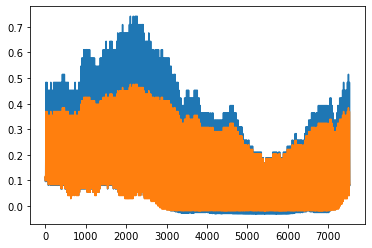

In [14]:
plt.plot(X['AWT26_Power'])
plt.plot(X['AWP_200_Power'])

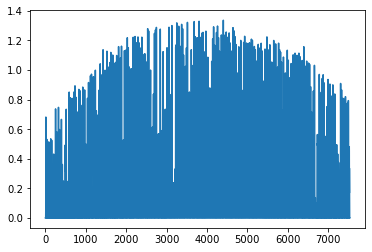

In [15]:
plt.plot(X['Solar_AllMax'])

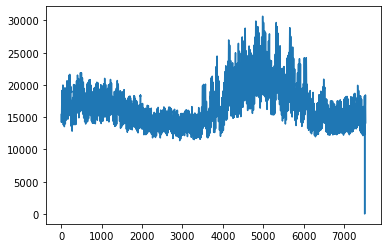

In [17]:
plt.plot(target['Consumption'])